In [1]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
from shapely import wkt

### Read Data

In [2]:
data = gpd.pd.read_csv("raw_data.csv")

In [3]:
data.columns

Index(['id', 'codigo', 'nomoficial', 'alt_izqini', 'alt_izqfin', 'alt_derini',
       'alt_derfin', 'nomanter', 'nom_mapa', 'tipo_c', 'long', 'sentido',
       'observa', 'bicisenda', 'red_jerarq', 'tipo_ffcc', 'comuna', 'com_par',
       'com_impar', 'barrio', 'barrio_par', 'barrio_imp', 'geometry'],
      dtype='object')

In [4]:
df = data[["id", "nomoficial", "nom_mapa", "tipo_c", "long", "sentido", "comuna", "geometry"]].copy()

In [5]:
df.isnull().sum()/df.shape[0]

id            0.000000
nomoficial    0.000000
nom_mapa      0.001439
tipo_c        0.000031
long          0.000000
sentido       0.000031
comuna        0.054106
geometry      0.000000
dtype: float64

### Clean Data

In [6]:
# Oficial Name

In [7]:
df['nomoficial'] = df['nomoficial'].str.lower()

In [8]:
# Map Name

In [9]:
df.nom_mapa.fillna(value = "undefined",inplace = True)
df['nom_mapa'] = df['nom_mapa'].str.lower()

/var/folders/yn/mgz4fxbx6ts1cp504y2cl4880000gn/T/ipykernel_13562/3788867562.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.nom_mapa.fillna(value = "undefined",inplace = True)


In [10]:
# Street type

In [11]:
df.tipo_c.value_counts()

tipo_c
CALLE                      22557
AVENIDA                     6993
PASAJE                      1387
SENDERO                      478
AUTOPISTA                    117
BAJADA AUTOPISTA              69
BOULEVARD                     67
PUENTE                        65
ENLACE AUTOPISTA              62
SUBIDA AUTOPISTA              58
CALLE PEATONAL                42
PASAJE PARTICULAR             35
PASAJE PEATONAL               22
CALLE PASAJE PARTICULAR        1
TÚNEL                          1
PASAJE PÚBLICO                 1
Name: count, dtype: int64

In [12]:
df.tipo_c.fillna(value = "PASAJE PEATONAL", inplace = True)

/var/folders/yn/mgz4fxbx6ts1cp504y2cl4880000gn/T/ipykernel_13562/4081330858.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.tipo_c.fillna(value = "PASAJE PEATONAL", inplace = True)


In [13]:
values_to_drop = ["SENDERO","CALLE PEATONAL","PASAJE PARTICULAR","PASAJE PEATONAL","CALLE PASAJE PARTICULAR","TÚNEL","PASAJE PÚBLICO"]

In [14]:
df = df[~df['tipo_c'].isin(values_to_drop)]

In [15]:
df.tipo_c.value_counts()

tipo_c
CALLE               22557
AVENIDA              6993
PASAJE               1387
AUTOPISTA             117
BAJADA AUTOPISTA       69
BOULEVARD              67
PUENTE                 65
ENLACE AUTOPISTA       62
SUBIDA AUTOPISTA       58
Name: count, dtype: int64

In [16]:
df['tipo_c'] = df['tipo_c'].str.lower()

### Direction

In [17]:
df.sentido.value_counts()

sentido
CRECIENTE       12492
DECRECIENTE     12114
DOBLE            6150
PEATONAL          594
PJE. PRIVADO       25
Name: count, dtype: int64

In [18]:
df.sentido.fillna(value = "PEATONAL PEATONAL", inplace = True)

/var/folders/yn/mgz4fxbx6ts1cp504y2cl4880000gn/T/ipykernel_13562/4079604953.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.sentido.fillna(value = "PEATONAL PEATONAL", inplace = True)


In [19]:
values_to_drop = ["PEATONAL","PJE. PRIVADO"]

In [20]:
df = df[~df['sentido'].isin(values_to_drop)]

In [21]:
df.sentido.value_counts()

sentido
CRECIENTE      12492
DECRECIENTE    12114
DOBLE           6150
Name: count, dtype: int64

In [22]:
df['sentido'] = df['sentido'].str.lower()

### Geometry

In [23]:
df["geometry"] = df["geometry"].apply(wkt.loads)

### Final Map

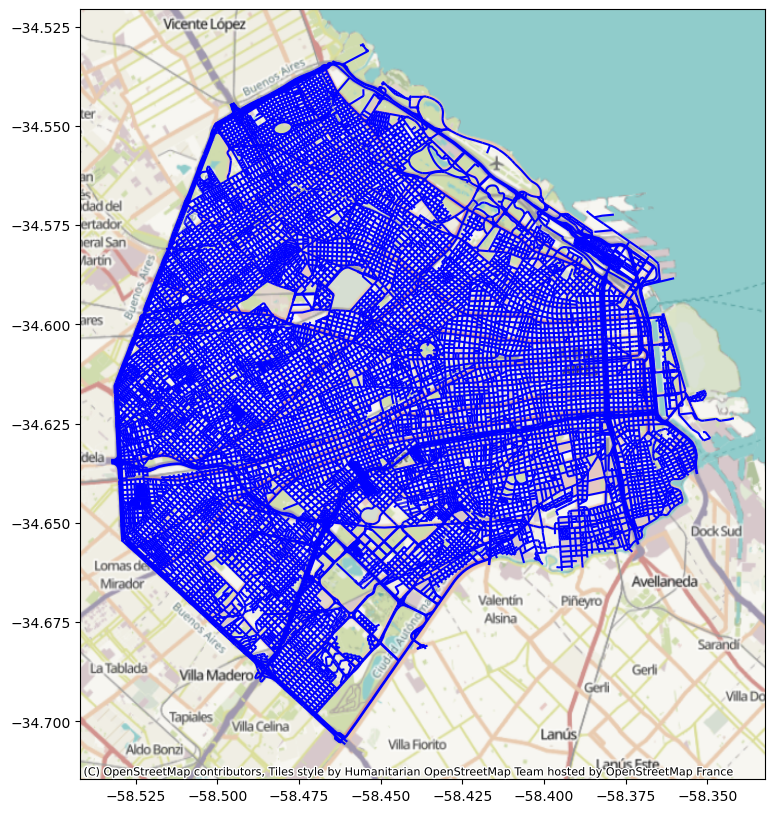

In [24]:
gdf = gpd.GeoDataFrame(df, geometry='geometry')
gdf = gdf.set_crs("EPSG:4326")
ax = gdf.plot(figsize=(10, 10), color="blue")
ctx.add_basemap(ax, crs=gdf.crs.to_string())

### Rename and export

In [25]:
df.rename(columns = {"nomoficial":"oficial_name","nom_mapa":"map_name","tipo_c":"street_type","long":"distance","sentido":"direction",
                     "comuna":"neightborhood"}, inplace = True)

In [26]:
df

,id,oficial_name,map_name,street_type,distance,direction,neightborhood,geometry
0,1,"cantilo, int.",int. cantilo,calle,436.858613,creciente,13.0,LINESTRING (-58.462187566063186 -34.5345159046...
1,2,"lugones, leopoldo av.",av. leopoldo lugones,avenida,295.580867,creciente,13.0,LINESTRING (-58.46514781908041 -34.53465378336...
2,3,"paz, gral. av.",av.gral paz,avenida,145.474786,decreciente,13.0,LINESTRING (-58.46561093444613 -34.53507012444...
3,4,del libertador av.,av.del libertador,avenida,10.152599,doble,13.0,LINESTRING (-58.466760565799966 -34.5359255422...
4,5,"colectora cantilo, int.",colectora int. cantilo,calle,78.551117,creciente,13.0,LINESTRING (-58.46065372135129 -34.53511662698...
...,...,...,...,...,...,...,...,...
31951,33116,lujan,lujan,calle,126.023118,decreciente,4.0,LINESTRING (-58.378625237730205 -34.6563835687...
31952,33117,puente bosch,puente bosch,calle,28.025957,decreciente,4.0,LINESTRING (-58.37845241953238 -34.65658101788...
31953,33118,"obligado rafael, av.costanera",av.costanera rafael obligado,avenida,84.303673,decreciente,14.0,LINESTRING (-58.400853267375844 -34.5689689760...
31954,33119,"obligado rafael, av.costanera",av.costanera rafael obligado,avenida,120.503669,creciente,14.0,LINESTRING (-58.40036493660334 -34.56888978127...


In [27]:
df.to_csv("knowledge_base/streets.csv")